# Guide

## Import libraries

In [2]:
# Standard library imports
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.stats as st
from scipy.optimize import curve_fit

from src.execution.save_and_load_forces import load_forces
from src.model.helpers import use_symmetry_force_curve, velocity_to_si, force_to_acceleration
from src.model.molecules import BaF

## Definition of parameters and constants
I put them here all in the top, to keep track of them. The parameters will be introduced in the text. 

In [3]:
# Global constants
c    = 299792458         # m/s, speed of light
kB   = 1.380649e-23      # J/K. Boltzmann constant
amu  = 1.66053904e-27    # kg, molar mass conversion constant
h    = 6.62607015e-34    # J s,  Planck constant
hbar = h/(2*np.pi)
g    = 9.81              # m/s**2, constant of acceleration due to Earth's gravity

wavevector =  2*np.pi/860e-9
gamma      =  1/60e-9

mass = BaF.mass


In [4]:
# see eq. 7.1 Metcalf and van der Straten with factor 4500/15000 to get proper acceleration according to simulations of Roman
def fitfunction(vx_list,fudgefactor,s0,detuning):
    fit = np.array([0.0 for j in range(len(vx_list))])
    for j in range(len(vx_list)):
        fit[j] = fudgefactor*((gamma/2)*(s0/(1 + s0 + (2*(detuning*gamma + wavevector*vx_list[j])/gamma)**2))*hbar*wavevector \
                              -(gamma/2)*(s0/(1 + s0 + (2*(detuning*gamma - wavevector*vx_list[j])/gamma)**2))*hbar*wavevector)/mass
    return fit


## Checking scattering force


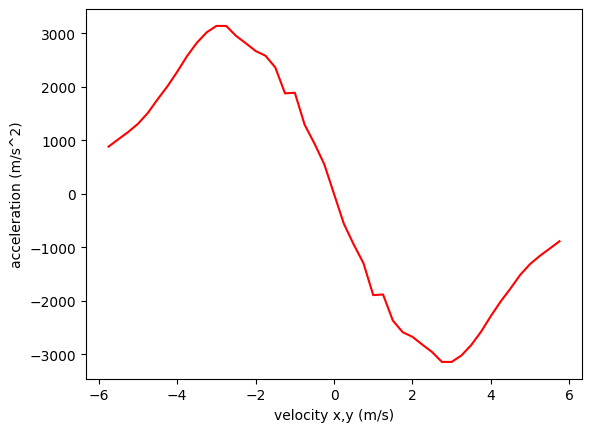

In [7]:
# velocity_sim_s = []
# ascat_sim_s = []
# velocity_sim = []
# ascat_sim = []
# vary = []
# 
# with open('S12Gamma1_1.dat') as f:
#     for line in f:
#         data = line.split()
#         
# for i in range(int(len(data)/2)):
#     velocity_sim_s.append(data[2*i].strip('[(,)]'))
#     ascat_sim_s.append(data[2*i+1].strip('[(,)]')) 
#   
# for i in range(int(len(velocity_sim_s))):
#     velocity_sim.append(float(velocity_sim_s[i]))
#     ascat_sim.append(float(ascat_sim_s[i]))
#     vary.append(1.)
    
    
molecule = BaF
detuning = -1
saturation = 4
mag_field_strength = 2
    
velocity_sim, ascat_sim = use_symmetry_force_curve(*load_forces('obe', detuning, saturation, molecule, additional_title='%.1f_45' % mag_field_strength, directory='data_grid'))


plt.plot(velocity_sim,ascat_sim,"r")
plt.xlabel('velocity x,y (m/s)')
plt.ylabel('acceleration (m/s^2)')
plt.show()
        

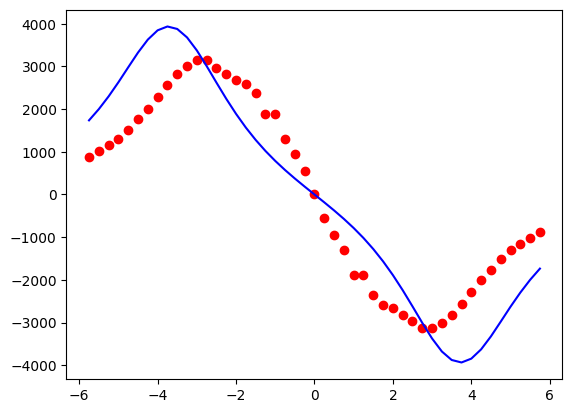

In [8]:
fudgefactor = 0.27
s0 = 1.68
detuning = 1.62
fit = fitfunction(velocity_sim,fudgefactor,s0,detuning)

plt.plot(velocity_sim,ascat_sim,"or")
plt.plot(velocity_sim,fit,"b")
plt.show()

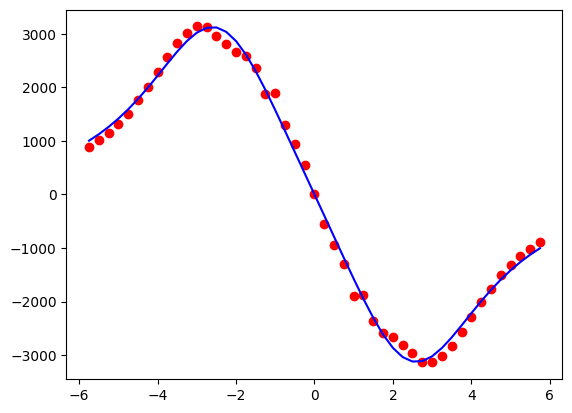

91.2
0.2022358358635987 3.332855301024069 1.066704770599721


In [9]:
from scipy.optimize import leastsq
def residual(vars, vx_list, data, eps_data):
   afit = vars          
   chi  = 0. 
   fit  = fitfunction(velocity_sim,afit[0],afit[1],afit[2])
   for j in range(len(vx_list)):
       chi +=    ((ascat_sim - fit[j])/1.)**2/float(len(vx_list)) 
#   print(np.sqrt(chi))
#   print(vars)
   return ((ascat_sim-fit) / 1.)

vary = np.array(velocity_sim.shape) + 1.0

afit = [fudgefactor,s0,detuning]
vars = afit
out  = leastsq(residual, vars, args=(velocity_sim, ascat_sim, np.sqrt(vary)))

fudgefactor  = out[0][0]
s0           = out[0][1]
detuning     = out[0][2]

fit = fitfunction(velocity_sim,fudgefactor,s0,detuning)

plt.plot(velocity_sim,ascat_sim,"or")
plt.plot(velocity_sim,fit,"b")
plt.show()

print(saturation * 4 * 5.7)

print(fudgefactor,s0,detuning)  

In [10]:
#s0 = 0.